# Prediction based on primary fuel parameters from the global power plant database

In [1]:
#Important libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing,Normalizing 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

#For multicollinearity
from statsmodels.stats.outliers_influence import  variance_inflation_factor

#Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import  RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

#Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
from sklearn.metrics import plot_roc_curve,r2_score,roc_curve

import warnings
warnings.filterwarnings('ignore')

### Maximum number of columns in data
Set the number of columns to display under the width

In [2]:
pd.set_option('display.max_columns', 27)
pd.set_option('display.width', 1000)

### Load the data using the pandas library.

In [3]:
data=pd.read_csv('database_IND.csv')
data.head(3)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print ('DELETE DUPLICATE ROWS :-',data.drop_duplicates(inplace=True))
print ('SHAPE of data         :-',data.shape)
print ('-----------------------------------')

DELETE DUPLICATE ROWS :- None
SHAPE of data         :- (907, 27)
-----------------------------------


### Information about data

In [5]:
data.info()
print ('---------------------------------------------------------')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

#### Observation:-
Problem statement is  indicate that the label is primary_fuel and that it is classes, hence LogisticRegression is utilized..

In [6]:
data.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2', 'other_fuel3', 'commissioning_year', 'owner', 'source', 'url', 'geolocation_source', 'wepp_id', 'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019', 'generation_data_source', 'estimated_generation_gwh'], dtype='object')

In [7]:
print (data.shape)

(907, 27)


### Examine the data contribution of the columns
with the help of value_counts()

In [8]:
print (data['country'].value_counts())
print (data['country_long'].value_counts())
print (data['name'].value_counts())
print (data['gppd_idnr'].value_counts())
print (data['latitude'].value_counts())
print (data['longitude'].value_counts())
print (data['primary_fuel'].value_counts())
print (data['other_fuel1'].value_counts())
print (data['other_fuel2'].value_counts())
print (data['other_fuel3'].value_counts())
print (data['commissioning_year'].value_counts())
print (data['owner'].value_counts())
print (data['source'].value_counts())
print (data['url'].value_counts())
print (data['geolocation_source'].value_counts())
print (data['wepp_id'].value_counts())
print (data['year_of_capacity_data'].value_counts())
print (data['generation_gwh_2013'].value_counts())
print (data['generation_gwh_2014'].value_counts())
print (data['generation_gwh_2015'].value_counts())
print (data['generation_gwh_2016'].value_counts())
print (data['generation_gwh_2017'].value_counts())
print (data['generation_gwh_2018'].value_counts())
print (data['generation_gwh_2019'].value_counts())
print (data['generation_data_source'].value_counts())
print (data['estimated_generation_gwh'].value_counts())

IND    907
Name: country, dtype: int64
India    907
Name: country_long, dtype: int64
ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64
WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64
19.0004    3
24.1917    3
24.8747    2
13.2450    2
11.5336    2
          ..
22.7554    1
27.1598    1
17.2970    1
20.8772    1
9.9344     1
Name: latitude, Length: 836, dtype: int64
71.6917    4
75.8988    3
71.6918    3
72.8983    3
81.2875    3
          ..
70.3961    1
74.2393    1
77.0435    1
73.8254    1
77.4768    1
Name: longi

#### Data distribution representations

<AxesSubplot:ylabel='count'>

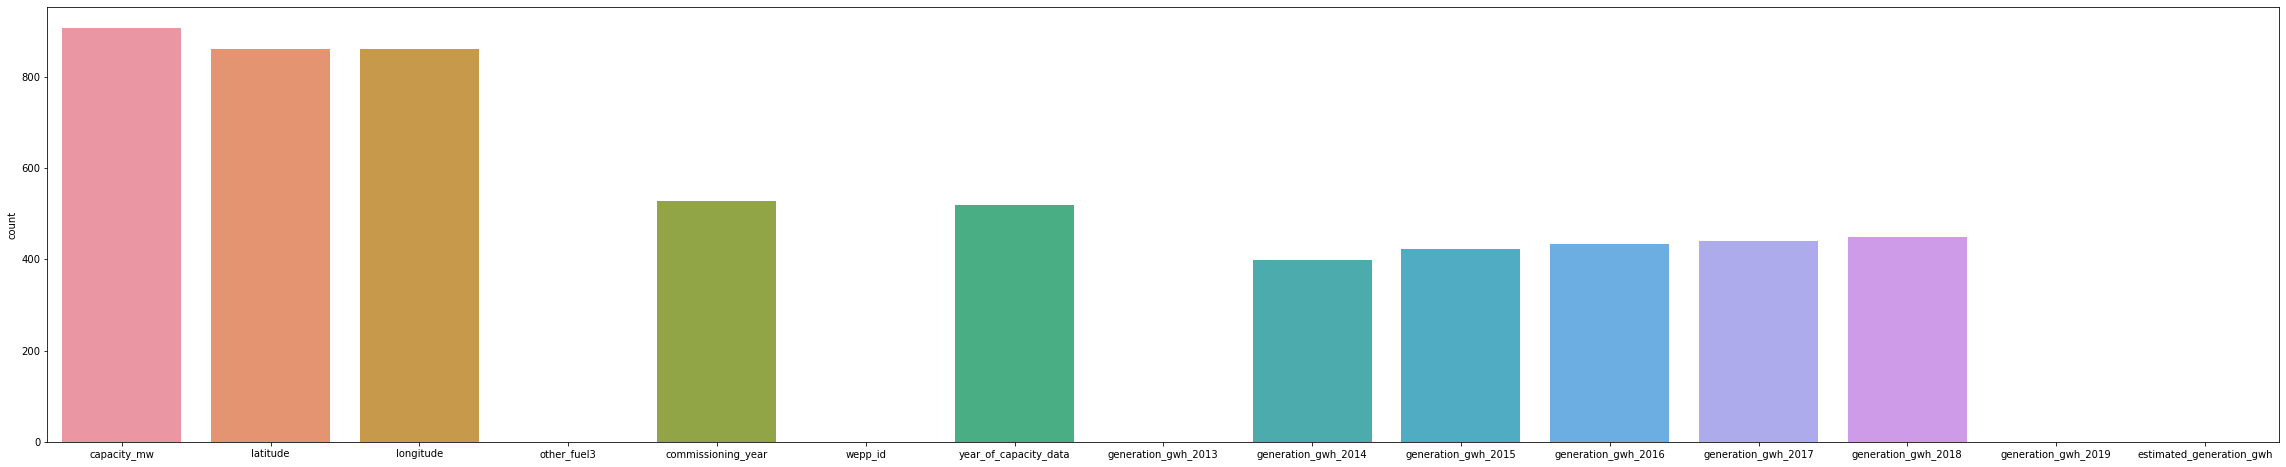

In [9]:
plt.figure(figsize=(40,8))
sns.countplot(data=data)

#### Observation :-
- According to Visuals, capacity mw has the highest count, while generation gwh 2014 has the lowest.
-ZERO contribution --> other_fuel3,wepp_id,generation_gwh_2019,estimated_generation_gwh

#### Conclusion :-
- Delete columns with 0 contribution 
- Remove columns with same values, such as country,country long,year_of_capacity_data

### DELETE COLUMNS
with the help of .drop method

In [10]:
data.drop('country',axis=1,inplace=True)
data.drop('country_long',axis=1,inplace=True)
data.drop('wepp_id',axis=1,inplace=True)
data.drop('other_fuel2',axis=1,inplace=True)
data.drop('generation_gwh_2013',axis=1,inplace=True)
data.drop('generation_gwh_2019',axis=1,inplace=True)
data.drop('estimated_generation_gwh',axis=1,inplace=True)
data.drop('other_fuel3',axis=1,inplace=True)
data.drop('year_of_capacity_data',axis=1,inplace=True)
data.drop('generation_data_source',axis=1,inplace=True)

print('After eliminating the columns, examine the data shape :-',data.shape)

After eliminating the columns, examine the data shape :- (907, 17)


### Result :-
- Before eliminating the columns ---> (907,27)
- After eliminating the columns ----> (907,17)

### Verify whether any data contains null values.
Applying isna().sum() method

In [11]:
data.isna().sum()

name                     0
gppd_idnr                0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
owner                  565
source                   0
url                      0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

### Graphic representation of the nall values

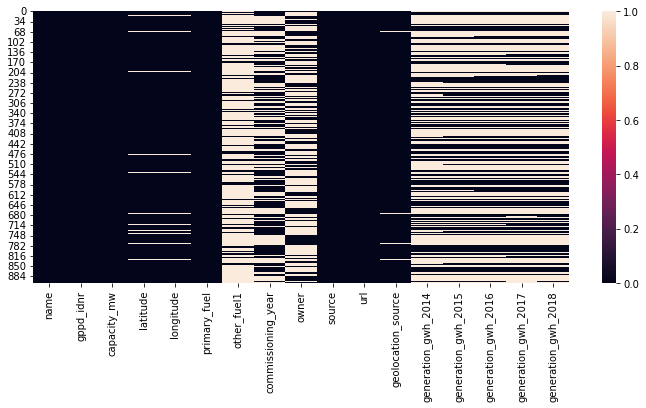

In [12]:
plt.figure(figsize=(12,5))
sns.heatmap(data.isna())
plt.show()

#### Observation:-
- According to the visuals the dark colour represents zero null values and the light colour represents null values.
- The following columns contain null values:-
  (latitude,longitude,other_fuel1,commissioning_year,owner,geolocation_source,generation_gwh_2014,
  generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source)

#### Conclusion
Fill in null values using mean/mode

###  Selection of  mode / mean
- mode for Frequent values
- mean for Continuous values

In [13]:
data['latitude'].fillna(data['latitude'].mean(),inplace=True)
data['longitude'].fillna(data['longitude'].mean(),inplace=True)
data['other_fuel1'].fillna(data['other_fuel1'].mode()[0],inplace=True)
data['commissioning_year'].fillna(data['commissioning_year'].mean(),inplace=True)
data['owner'].fillna(data['owner'].mode()[0],inplace=True)
data['geolocation_source'].fillna(data['geolocation_source'].mode()[0],inplace=True)
data['generation_gwh_2014'].fillna(data['generation_gwh_2014'].mean(),inplace=True)
data['generation_gwh_2015'].fillna(data['generation_gwh_2015'].mean(),inplace=True)
data['generation_gwh_2016'].fillna(data['generation_gwh_2016'].mean(),inplace=True)
data['generation_gwh_2017'].fillna(data['generation_gwh_2017'].mean(),inplace=True)
data['generation_gwh_2018'].fillna(data['generation_gwh_2018'].mean(),inplace=True)

#### Check to see if there are any null values in the data.

In [14]:
data.isna().sum()

name                   0
gppd_idnr              0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
owner                  0
source                 0
url                    0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

### Graphic representation of the nall values

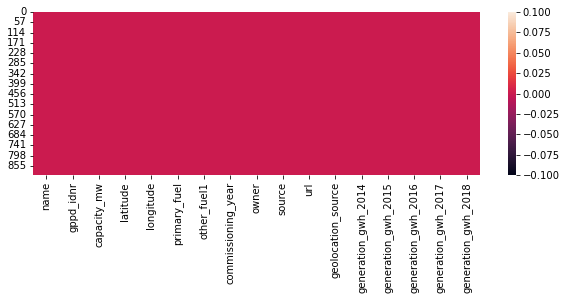

In [15]:
plt.figure(figsize=(10,3))
sns.heatmap(data.isna())
plt.show()

### Result:- 
The data has no null values.

In [16]:
data.groupby('primary_fuel').aggregate(['min', 'max']) 

name                                 gppd_idnr             capacity_mw          latitude          longitude            other_fuel1      commissioning_year  ...                                                url geolocation_source      generation_gwh_2014              generation_gwh_2015               generation_gwh_2016               generation_gwh_2017               generation_gwh_2018              
                                   min                           max         min         max         min      max      min      max       min      max           min  max                min  ...                                                max                min  max                 min          max                 min           max                 min           max                 min           max                 min           max
primary_fuel                                                                                                                                                                                  ...                                                                                                                                                                                                                                                    
Biomass              ARVINDNAGAR SUGAR            YASHWANTRAO MOHITE  WRI1019884  WRI1020007       10.00    50.00  12.1056  27.6010   72.2242  79.7708           Oil  Oil        1997.091082  ...  https://www.zaubacorp.com/company/MAHATMA-SUGA...                WRI  WRI          2431.82359   2431.82359         2428.226946   2428.226946         2467.936859   2467.936859         2547.759305   2547.759305         2600.804099   2600.804099
Coal               ADITYA CEMENT WORKS                   ZAWAR MINES  IND0000002  WRI1020016       10.00  4760.00   8.7603  31.7537   68.6447  90.5287  Cogeneration  Oil        1966.000000  ...                          https://www.vardhman.com/                WRI  WRI             0.00000  28127.00000            0.000000  30539.000000            0.000000  30015.000000            0.000000  35116.000000            0.000000  35136.000000
Gas                        AGARTALA GT                 VIJESWARAM GT  IND0000001  WRI1020017       15.50  1967.08   9.2404  29.1411   69.7399  95.4080           Oil  Oil        1988.000000  ...                                https://mrpl.co.in/                WRI  WRI             0.00000   3393.00900            0.000000   3516.449000            0.000000   4654.180000            0.000000   6396.120000            0.000000   6104.300000
Hydro                           ALIYAR                 WY.CANAL A -D  IND0000004  IND0000540        3.30  1956.00   8.5319  34.6490   73.0575  94.2612           Oil  Oil        1927.000000  ...                             http://www.cea.nic.in/                WRI  WRI             0.00000   6803.31250            0.000000   7277.221050            0.000000   7015.386800            0.000000   7171.691350            0.000000   6474.614250
Nuclear                  DAE RAJASTHAN                       TARAPUR  IND0000086  WRI1026848      100.00  2000.00   8.1689  28.1560   72.6617  80.1754           Oil  Oil        1972.000000  ...  https://www.iaea.org/PRIS/CountryStatistics/Re...                WRI  WRI          2356.63000   9335.00000            0.000000   9453.000000            0.000000   9887.200000            0.000000   7894.400000            0.000000   9845.760000
Oil                         BELLARY DG                 YELHANKA (DG)  IND0000044  WRI1020014       21.84   500.00   9.9751  34.0040   72.8963  78.9535           Gas  Oil        1965.000000  ...                       https://bharatpetroleum.com/                WRI  WRI             0.00000   2431.82359            0.000000   2428.226946            0.000000   2467.936859            0.000000   2547.759305            0.000000   2600.804099
Solar                 ACME Solar Tower  Yelesandra Solar Power Plant  WRI1020238  WRI1026222

# Summarize the dataset with graphics

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

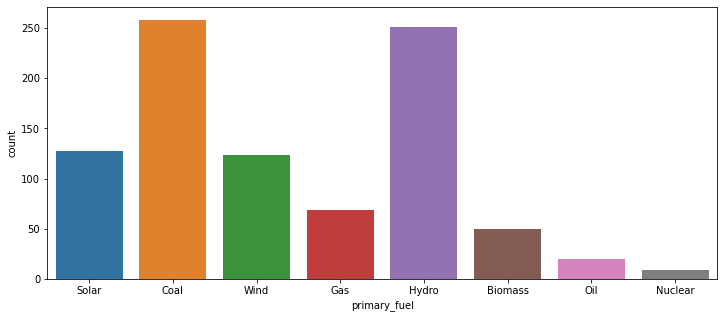

In [17]:
plt.figure(figsize=(12,5))
sns.countplot(data=data,x='primary_fuel')

#### Observation:-
- Biomass has a higher count value than all primary fuels combined.
- Wind's count value is less than the total value of all main fuels.

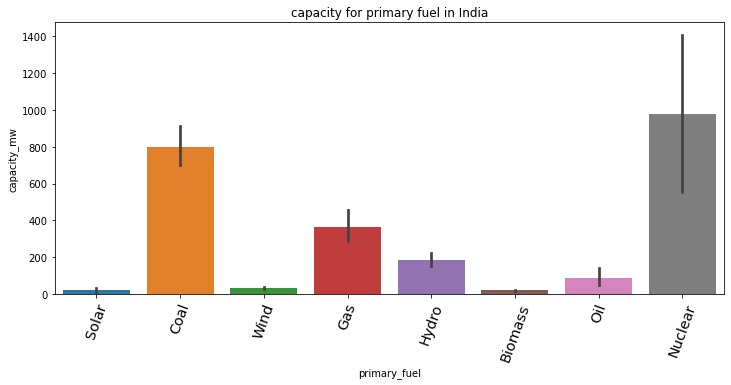

In [18]:
plt.figure(figsize=(12,5))
sns.barplot(x= "primary_fuel", y = "capacity_mw", data =data)
plt.xticks(rotation=70,fontweight='light', fontsize='x-large')
plt.title('capacity for primary fuel in India')
plt.show()

### Observation
- Nuclear power and Coal station with the highest capacity
- Renewable energy with the lowest capacity

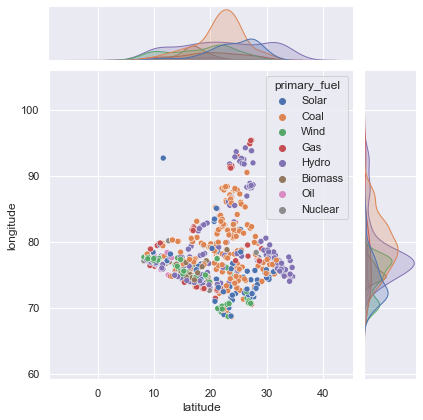

In [19]:
sns.set_theme(style="darkgrid")
sns.jointplot(data=data, x='latitude', y='longitude', hue='primary_fuel')

#### Observation:-
- The Primary fuel of GAS has the greatest degree of longitude, which ranges from 92 to 100.
- The Primary fuel of SOLAR has the greatest degree of Latitude, which ranges from 68.92 to 92.71

<AxesSubplot:xlabel='capacity_mw', ylabel='primary_fuel'>

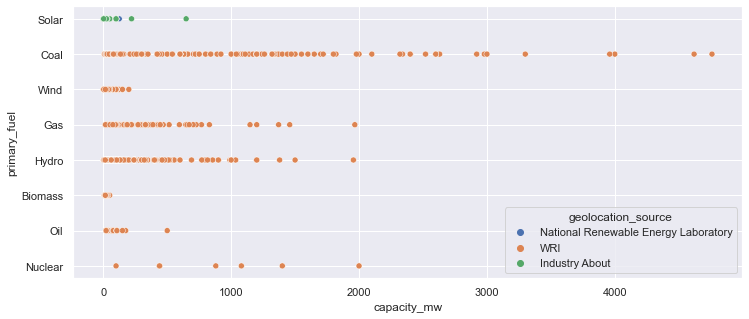

In [20]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=data, x='capacity_mw', y='primary_fuel', hue='geolocation_source')

#### Observation
for WRI sources, the maximum primary fuel capacity is used.

#### TRANSFORM DATA TO NUMERICAL FORMAT
Categorical data can be converted into numerical representation using Label Encoder.

In [21]:
obj_col=[]
for i in data.columns:
    if data[i].dtype=='object':
        obj_col.append(i)
        
le=LabelEncoder()
for j in obj_col:
    data[j]=le.fit_transform(data[j])

data.head(3)

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,657,2.5,28.1839,73.2407,6,2,2011.000000,229,109,128,1,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099
1,1,519,98.0,24.7663,74.6090,1,2,1997.091082,258,174,173,2,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099
2,2,853,39.2,21.9038,69.3732,7,2,1997.091082,2,21,205,2,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099


In [22]:
data.head(3)

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,657,2.5,28.1839,73.2407,6,2,2011.000000,229,109,128,1,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099
1,1,519,98.0,24.7663,74.6090,1,2,1997.091082,258,174,173,2,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099
2,2,853,39.2,21.9038,69.3732,7,2,1997.091082,2,21,205,2,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099


In [50]:
data['primary_fuel'].value_counts()

1    258
3    251
6    127
7    123
2     69
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

#### Observation:-
- categorical data converted into numerical form, as seen above
- In primary_fuel Number representation--> 1.Coal,2.Hydro,3.Solar,4.Wind,5.Gas,6.Biomass,7.Oil,8.Nuclear

#### describe method 
To determine whether the data is normally distributed or not

In [23]:
data.describe()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,453.000000,453.000000,326.223755,21.197918,77.464907,3.206174,1.995590,1997.091082,56.169791,43.847850,94.469680,1.733186,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,261.972645,261.972645,590.085456,6.079148,4.812291,2.280652,0.081259,13.016360,82.529116,44.642818,70.381222,0.677151,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041
min,0.000000,0.000000,0.000000,8.168900,68.644700,0.000000,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,226.500000,226.500000,16.725000,17.072000,74.388900,1.000000,2.000000,1997.091082,5.000000,22.000000,58.000000,2.000000,1211.362750,916.000000,896.500214,882.594850,824.842340
50%,453.000000,453.000000,59.200000,21.281800,76.979200,3.000000,2.000000,1997.091082,5.000000,22.000000,58.000000,2.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
75%,679.500000,679.500000,385.250000,25.176450,79.206100,6.000000,2.000000,2003.000000,95.500000,29.500000,115.500000,2.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
max,906.000000,906.000000,4760.000000,34.649000,95.408000,7.000000,2.000000,2018.000000,279.000000,190.000000,303.000000,2.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


#### Observation :-
We can say that the data is normally distributed based on the count of the same values seen in the table.

In [24]:
data.skew()

name                    0.000000
gppd_idnr               0.000000
capacity_mw             3.123576
latitude               -0.149698
longitude               1.141881
primary_fuel            0.472251
other_fuel1           -20.453120
commissioning_year     -1.399359
owner                   1.364406
source                  1.827373
url                     1.510537
geolocation_source     -2.159841
generation_gwh_2014     5.035446
generation_gwh_2015     5.364134
generation_gwh_2016     5.068427
generation_gwh_2017     5.110952
generation_gwh_2018     4.937907
dtype: float64

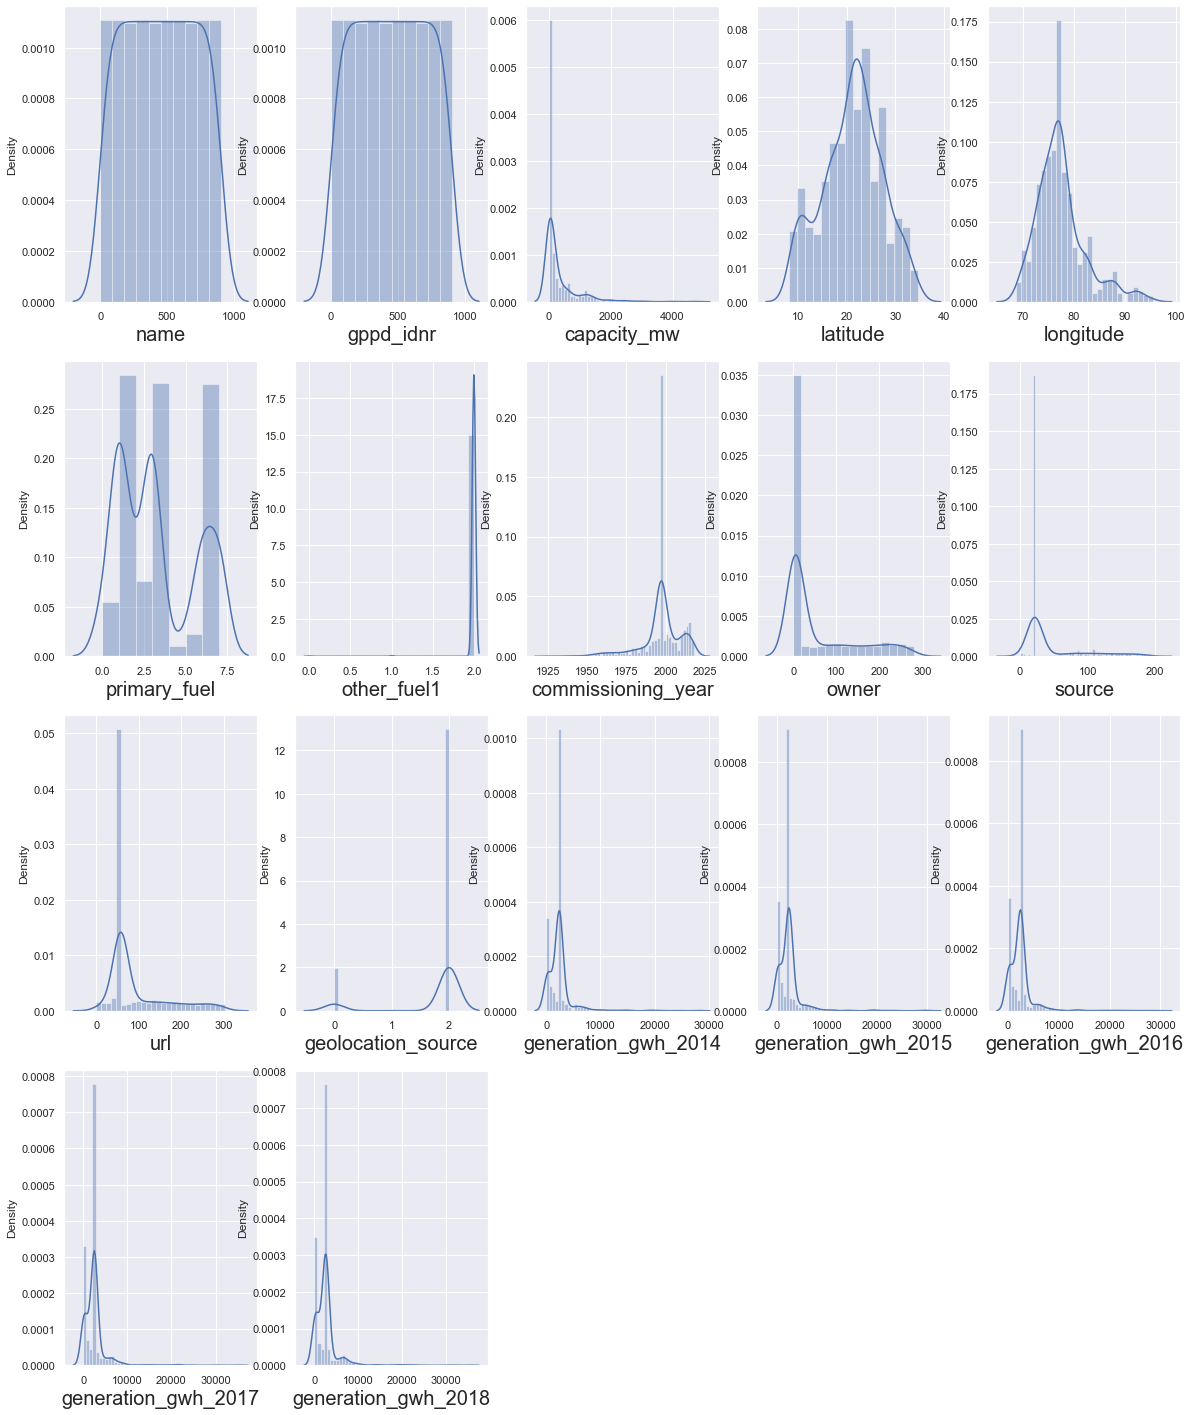

In [25]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=17:
        ax = plt.subplot(4,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
       
    plotnumber+=1
plt.show()

### correlation
which one set of data may correspond to another set.

In [26]:
correlation = data.corr()
correlation

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
name,1.000000,0.332205,0.060240,-0.135247,0.020279,0.040753,-0.074663,-0.043569,9.807492e-02,-1.463951e-02,4.191727e-02,3.622452e-02,8.375890e-02,7.366460e-02,6.617668e-02,7.363387e-02,6.663814e-02
gppd_idnr,0.332205,1.000000,-0.335742,-0.105728,-0.377812,0.609180,0.002333,0.044059,6.305894e-01,4.163838e-01,5.970803e-01,-4.641741e-01,4.451808e-02,3.895798e-02,2.683096e-02,2.285274e-02,1.926543e-02
capacity_mw,0.060240,-0.335742,1.000000,0.050984,0.195882,-0.380395,0.003105,0.274292,-3.110481e-01,-2.421218e-01,-2.438304e-01,2.048653e-01,6.943503e-01,7.111899e-01,7.422211e-01,7.575852e-01,7.734556e-01
latitude,-0.135247,-0.105728,0.050984,1.000000,0.036362,-0.010204,0.036695,0.102069,-7.118234e-02,5.592656e-02,-1.310376e-01,-1.842751e-01,4.432124e-02,3.639795e-02,3.125609e-02,3.121240e-02,3.132625e-02
longitude,0.020279,-0.377812,0.195882,0.036362,1.000000,-0.347948,0.030311,0.092331,-3.012853e-01,-2.393334e-01,-3.029847e-01,2.523426e-01,1.147221e-02,1.881819e-02,3.920892e-02,3.967547e-02,3.777965e-02
primary_fuel,0.040753,0.609180,-0.380395,-0.010204,-0.347948,1.000000,0.004912,-0.126650,2.842958e-01,5.361263e-02,5.898861e-01,-4.832168e-01,-1.247688e-01,-1.248280e-01,-1.310514e-01,-1.320034e-01,-1.369831e-01
other_fuel1,-0.074663,0.002333,0.003105,0.036695,0.030311,0.004912,1.000000,0.036904,3.368729e-02,2.658990e-02,2.815366e-02,-2.140831e-02,2.450509e-02,2.679006e-02,3.157459e-02,2.111693e-02,3.567517e-02
commissioning_year,-0.043569,0.044059,0.274292,0.102069,0.092331,-0.126650,0.036904,1.000000,1.507424e-02,2.152776e-02,1.091016e-02,-7.843657e-03,1.330505e-01,1.473376e-01,1.706440e-01,1.708631e-01,1.743766e-01
owner,0.098075,0.630589,-0.311048,-0.071182,-0.301285,0.284296,0.033687,0.015074,1.000000e+00,7.695825e-01,4.197726e-01,-3.848377e-01,1.211927e-18,-4.253175e-17,-8.115062e-18,-7.069909e-17,4.713271e-17
source,-0.014640,0.416384,-0.242122,0.055927,-0.239333,0.053613,0.026590,0.021528,7.695825e-01,1.000000e+00,1.601444e-01,-5.057202e-01,1.917854e-18,-2.160931e-17,-4.925637e-17,-1.284552e-16,1.092118e-17


### Heatmap
A heatmap is a two-dimensional graphical representation of data in which the individual values included in a matrix are represented as colours.

<AxesSubplot:>

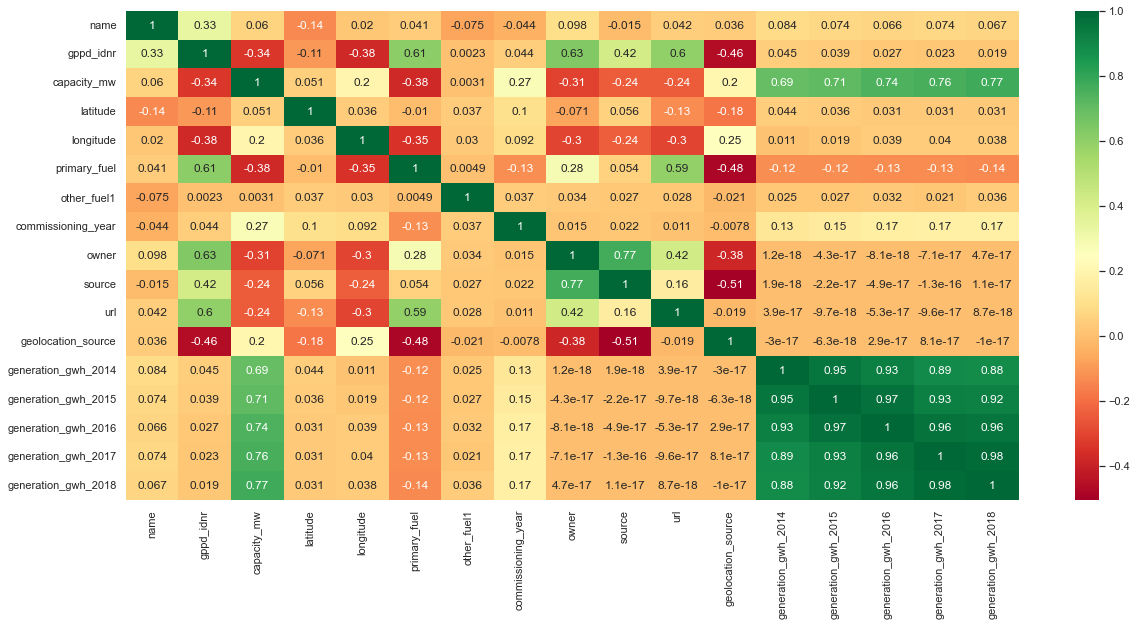

In [27]:
# Visualizing correlation

plt.figure(figsize=(20,9))

sns.heatmap(correlation,annot=True,cmap='RdYlGn')

#### Observation
- Dark Green indicates a high correlation.
- Dark Red indicates a low correlation.

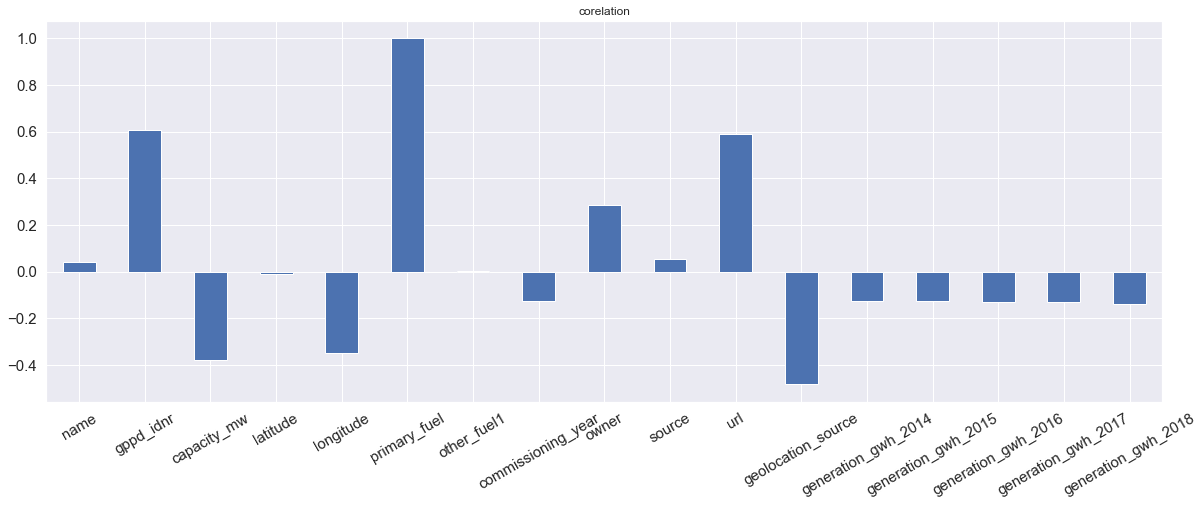

In [28]:
data.corrwith(data.primary_fuel).plot.bar(
figsize=(20,7),title='corelation',fontsize=15,
rot=30,grid=True)
plt.show()

### Pairplot
Pairplot visualises data to determine the connection between variables that might be continuous or categorical.

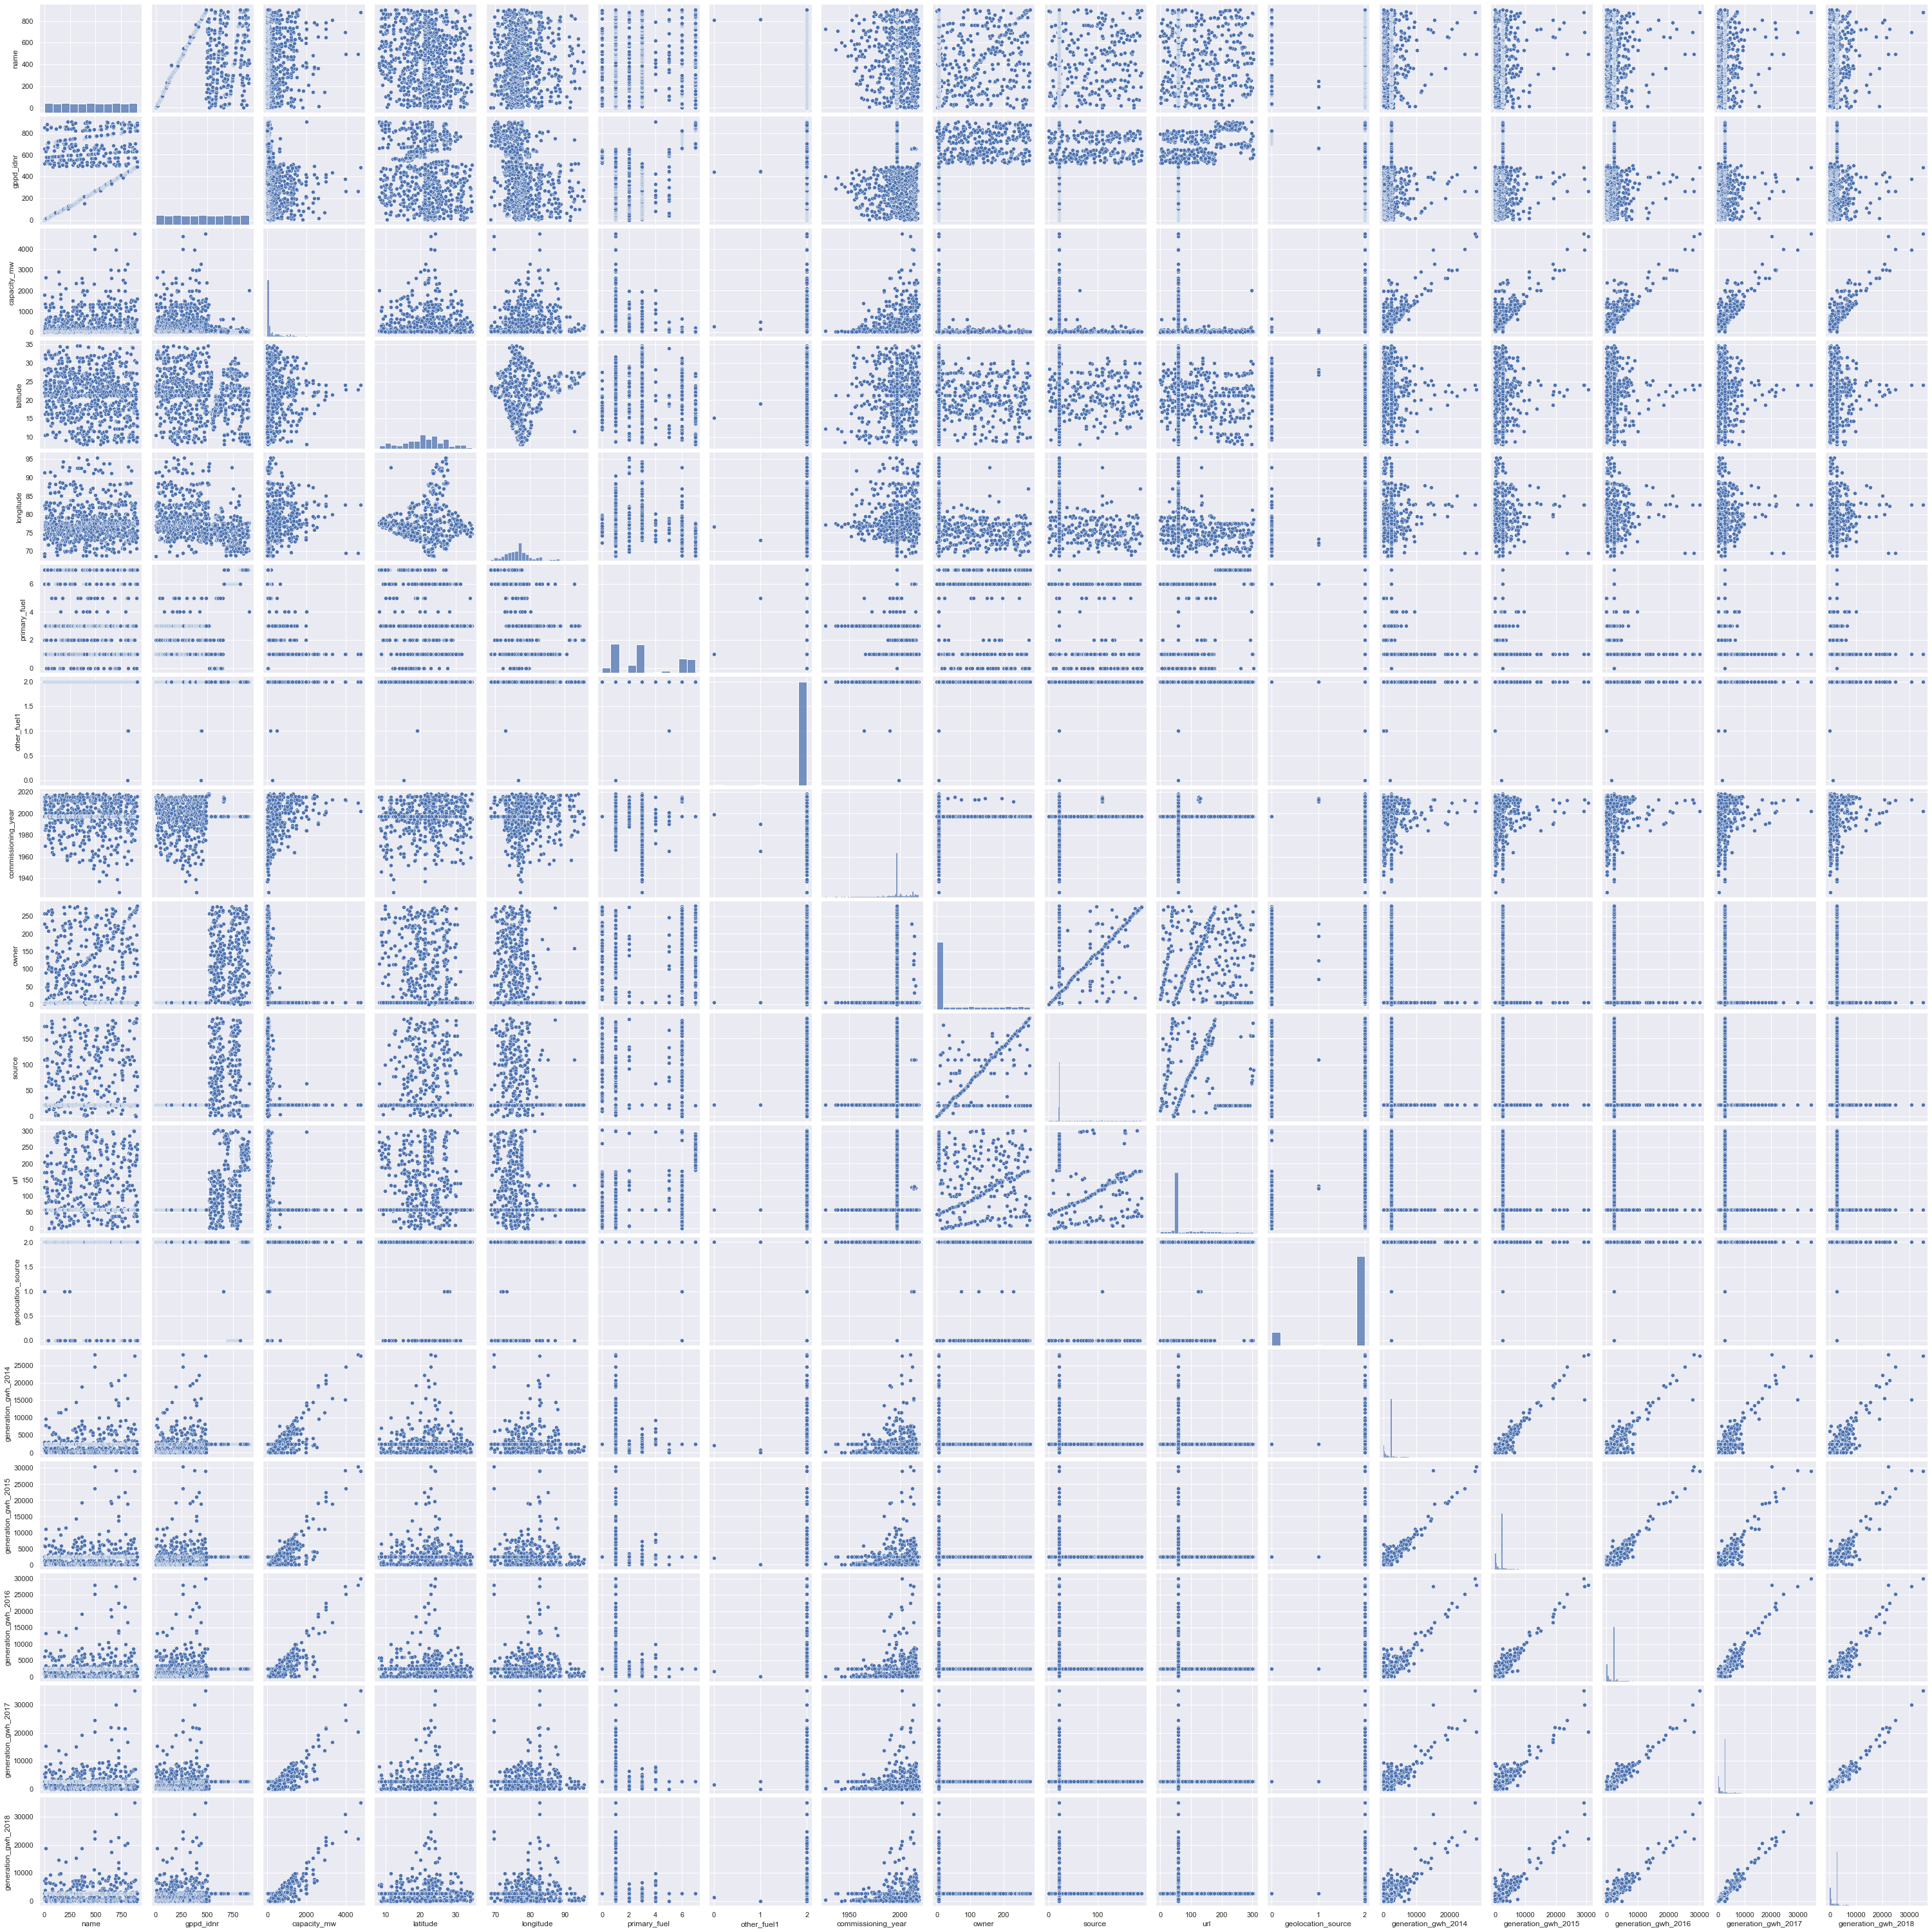

In [29]:
sns.pairplot(data)

### Data Preprocessing

Insert training input as well as label data

In [30]:
x = data.drop(columns=['primary_fuel'])
y = data['primary_fuel']

#### StandardScaler
Standardization where the features are rescaled to have 0 mean and unit standard deviation. 

In [38]:
sc=StandardScaler() 
x_sc=sc.fit_transform(x)

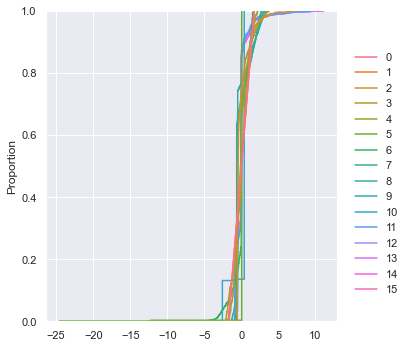

In [39]:
sns.displot(x_sc, kind='ecdf')

#### Variance Inflation Factor (VIF)
VIF was used to detect the presence of multicollinearity.

In [40]:
# multicolinearity ( good before 10)
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_sc, i) for i in range(x_sc.shape[1])]
vif["Features"] = x.columns

vif

,vif,Features
0,1.459678,name
1,4.259898,gppd_idnr
2,4.535718,capacity_mw
3,1.117815,latitude
4,1.252195,longitude
5,1.020632,other_fuel1
6,1.211157,commissioning_year
7,3.782901,owner
8,3.111254,source
9,2.073625,url


#### Observation
The VIF readings are all less than 5 and extremely low. That indicates there is no multicollinearity.
We may now proceed with fitting our data to the model.

DETERMIND RANDOM_STATE

In [42]:
maxAccu=0
maxRS=0

maxR2_Score=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x_sc,y,test_size=.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    score = r2_score(y_test, predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score," on Random_state ",maxRS)

Best accuracy is 0.8942320670675925  on Random_state  126


#### Observation:-
The random_state value is 126.

### Separate our data into two sets: test and training.

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x_sc,y,test_size=.30,random_state=maxRS)

#### Check Accuracy and Prediction of LogisticRegression

In [53]:
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
log_acc = accuracy_score(y_test,y_pred)

print ('Logistic Accuracy =>', log_acc)
print ('predict(x_test)   =>',y_pred)

Logistic Accuracy => 0.7985347985347986
predict(x_test)   => [7 1 3 3 7 1 3 3 7 7 0 3 3 1 1 1 7 3 6 3 6 3 7 0 1 6 3 3 3 1 1 3 1 0 0 6 3
 7 3 1 1 1 1 1 3 1 6 6 3 1 6 7 0 1 2 1 3 3 1 7 1 7 3 3 3 1 6 6 6 6 6 6 0 1
 1 3 6 0 3 1 3 3 3 3 1 1 7 3 3 1 1 6 6 6 1 3 3 7 1 3 6 1 3 7 3 7 1 1 6 6 7
 3 1 1 1 3 1 3 1 3 1 3 7 1 3 3 1 1 3 3 3 1 7 6 7 3 3 3 3 3 3 3 1 1 2 3 7 2
 1 1 1 1 7 3 0 7 6 3 7 1 3 3 6 3 3 1 3 1 0 3 3 1 7 1 6 7 3 7 0 1 3 1 7 7 1
 6 3 7 6 1 6 3 7 3 5 6 1 3 7 3 3 7 6 3 3 1 5 1 3 6 1 1 3 3 3 6 0 6 1 7 1 6
 1 7 3 1 3 1 0 7 1 7 3 3 3 6 3 2 7 3 1 3 1 1 1 3 2 1 1 7 1 0 1 1 1 7 6 7 3
 7 1 1 3 1 3 3 1 6 1 1 1 1 3]


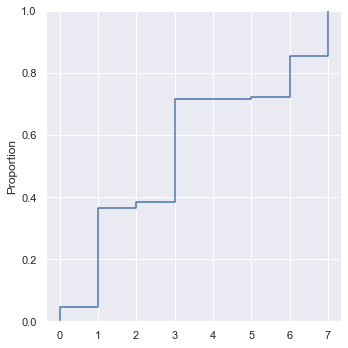

In [54]:
sns.displot(y_pred, kind='ecdf')

#### Observation :-
- highest prediction is 1 and 3, basically Coal and biomass
- lowest prediction is 0,2,4 and 5, basically oil,solar,wind

### Confusion_matrix
- Check the performance of LogisticRegression BY the confusion_matrix
- Confusion matrices are extensively utilised because they provide a more accurate picture of a model's performance than classification accuracy.

In [51]:
log_conf_mat = confusion_matrix(y_test,y_pred)
print ('Logistic conf_mat ','\n', log_conf_mat)

# Predict :- (use only +tive & -tive)
# actual  :- (use only true & false)

true_positive = log_conf_mat[0][0]
false_positive = log_conf_mat[0][1]
false_negative = log_conf_mat[1][0]
true_negative = log_conf_mat[1][1]

# Breaking down the formula for Accuracy
Log_Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
print ('Accuracy = > ', Log_Accuracy)

Error_rate = 1-Log_Accuracy
print ('Error_rate = > ', Error_rate)

# Precison 
Log_Precision = true_positive/(true_positive+false_positive)# denominator --> predicted (+tive)
print ('Precision = > ', Log_Precision)

# Recall
Log_Recall = true_positive/(true_positive+false_negative) # denominator --> actual yes 
print ('Recall = > ', Log_Recall)

# F1 Score
Log_F1_Score = 2*(Log_Recall * Log_Precision) / (Log_Recall + Log_Precision)
print ('F1_Score = > ', Log_F1_Score)

Logistic conf_mat  
 [[11  7  0  0  0  0  0  0]
 [ 1 66  1  9  0  1  0  0]
 [ 1  2  1 14  0  0  0  0]
 [ 0 11  2 63  0  0  0  0]
 [ 0  1  0  2  0  0  0  0]
 [ 0  0  1  2  0  1  0  0]
 [ 0  0  0  0  0  0 36  0]
 [ 0  0  0  0  0  0  0 40]]
Accuracy = >  0.9058823529411765
Error_rate = >  0.09411764705882353
Precision = >  0.6111111111111112
Recall = >  0.9166666666666666
F1_Score = >  0.7333333333333334


Text(0.5, 12.5, 'Predicted label')

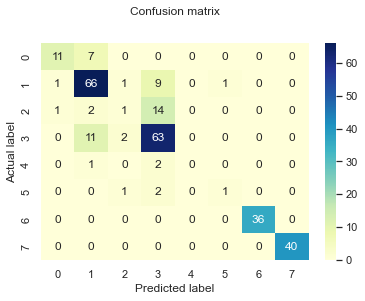

In [52]:
sns.heatmap(log_conf_mat,annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### Observation :-
- The dark blue shade reflects the accurate prediction.(66 is the actual prediction)
- The light shade reflects the unsatisfactory prediction.(0 is the unsatisfactory prediction.)

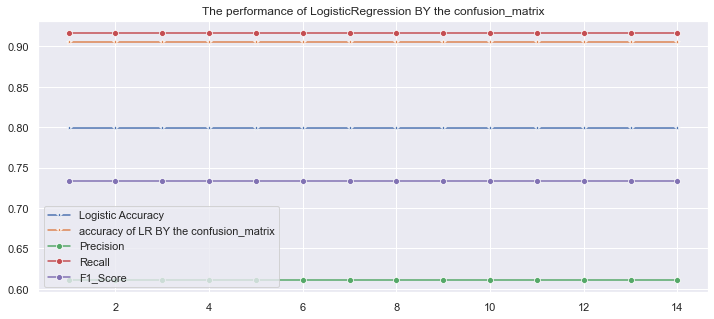

In [55]:
plt.figure(figsize=(12,5))
plt.title('The performance of LogisticRegression BY the confusion_matrix')
p = sns.lineplot(range(1,15),log_acc,marker='*',label='Logistic Accuracy')
p = sns.lineplot(range(1,15),Log_Accuracy,marker='*',label='accuracy of LR BY the confusion_matrix')
p = sns.lineplot(range(1,15),Log_Precision,marker='o',label='Precision')
p = sns.lineplot(range(1,15),Log_Recall,marker='o',label='Recall')
p = sns.lineplot(range(1,15),Log_F1_Score,marker='o',label='F1_Score')

#### Obervation:-
- LogisticRegression BY the confusion matrix has a greater accuracy than Logistic Accuracy.
- recall has a greater than Precision

### Combine numerous Regression to achieve the highest accuracy

In [56]:
model=[RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),GradientBoostingClassifier(),AdaBoostClassifier()]
for m in model:
    print("_________________________________________________________________________________________")
    print('accuracy score of ->', m)
    score=cross_val_score(m,x,y,cv=5)
    print(score)
    
    print("cross validation score:  ", abs(score.mean()))
    
    print("Difference between R2 score and cross validatio score is -> ",r2_score(y_test,y_pred)-abs(score.mean()))
    print("-----------------------------------------------------------------------------------------")

_________________________________________________________________________________________
accuracy score of -> RandomForestClassifier()
[0.83516484 0.87912088 0.90607735 0.85635359 0.85082873]
cross validation score:   0.8655090765588003
Difference between R2 score and cross validatio score is ->  0.028722990508792234
-----------------------------------------------------------------------------------------
_________________________________________________________________________________________
accuracy score of -> DecisionTreeClassifier()
[0.69230769 0.81318681 0.83977901 0.77900552 0.73480663]
cross validation score:   0.7718171331431
Difference between R2 score and cross validatio score is ->  0.12241493392449254
-----------------------------------------------------------------------------------------
_________________________________________________________________________________________
accuracy score of -> KNeighborsClassifier()
[0.68681319 0.6978022  0.71270718 0.75690608 0.701

#### Difference between R2 score and cross validatio score is ->  0.032
So that i prefer (RandomForestClassifier)

#### Examine the RandomForestClassifier's train and test scores.

In [57]:
test_scores = []
train_scores = []

for i in range(1,15):

    clf = RandomForestClassifier(i)
    clf.fit(x_train,y_train)
    
    train_scores.append(clf.score(x_train,y_train))
    test_scores.append(clf.score(x_test,y_test))
    
print('train_scores:-\n',train_scores)
print('test_scores:-\n',test_scores)

train_scores:-
 [0.9006309148264984, 0.9116719242902208, 0.9558359621451105, 0.9574132492113565, 0.9716088328075709, 0.9716088328075709, 0.9873817034700315, 0.9858044164037855, 0.9921135646687698, 0.9952681388012619, 0.9905362776025236, 0.9952681388012619, 0.9968454258675079, 0.9968454258675079]
test_scores:-
 [0.7435897435897436, 0.7875457875457875, 0.8131868131868132, 0.8205128205128205, 0.7912087912087912, 0.8571428571428571, 0.8315018315018315, 0.8278388278388278, 0.8571428571428571, 0.8461538461538461, 0.8315018315018315, 0.8278388278388278, 0.8278388278388278, 0.8388278388278388]


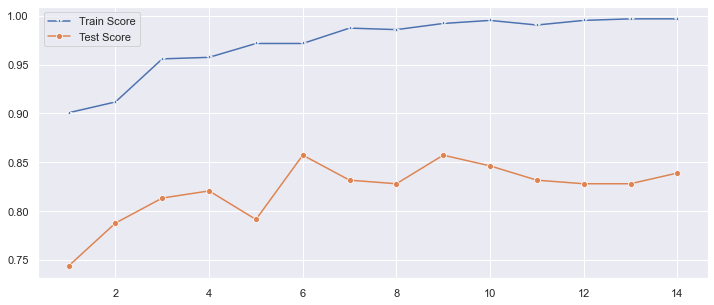

In [58]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

#### Obervation:-
- While the data is being trained, it receives a higher score, but when tested, it receives a lower score.

In [59]:
# RandomForestClassifier
clf = RandomForestClassifier()
params = {'n_estimators':[13,15],
         'criterion':['entropy'],
         'max_depth':[10],
          'min_samples_split':[10,11],
          'min_samples_leaf':[5,6]
         }

grd = GridSearchCV(clf,param_grid=params)
grd.fit(x_train,y_train)
print ('best_params = >', grd.best_params_)

clf = grd.best_estimator_
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)


rf_conf_mat = confusion_matrix(y_test,y_pred)
print ('conf_mat = >','\n', rf_conf_mat)
print ('Accuracy rf Normal ======> ', accuracy_score(y_test,y_pred))

best_params = > {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 15}
conf_mat = > 
 [[15  3  0  0  0  0  0  0]
 [ 2 68  3  5  0  0  0  0]
 [ 1  5  3  7  0  2  0  0]
 [ 0 14  2 60  0  0  0  0]
 [ 0  1  1  1  0  0  0  0]
 [ 0  0  1  2  0  1  0  0]
 [ 0  1  0  0  0  0 35  0]
 [ 0  0  0  0  0  0  0 40]]
Accuracy rf Normal ======>  0.8131868131868132


In [60]:
# Confusion matrix score (performance of a  RandomForestClassifier algorithm)
true_positive = rf_conf_mat[0][0]
false_positive = rf_conf_mat[0][1]
false_negative = rf_conf_mat[1][0]
true_negative = rf_conf_mat[1][1]

# Breaking down the formula for Accuracy
rf_Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
print ('Accuracy_cm = > ', rf_Accuracy)

# Precison
rf_Precision = true_positive/(true_positive+false_positive)
print ('Precision   = > ', rf_Precision)

# Recall
rf_Recall = true_positive/(true_positive+false_negative)
print ('Recall      = > ', rf_Recall)

# F1 Score
rf_F1_Score = 2*(rf_Recall * rf_Precision) / (rf_Recall + rf_Precision)
print ('F1_Score    = > ', rf_F1_Score)

Accuracy_cm = >  0.9431818181818182
Precision   = >  0.8333333333333334
Recall      = >  0.8823529411764706
F1_Score    = >  0.8571428571428571


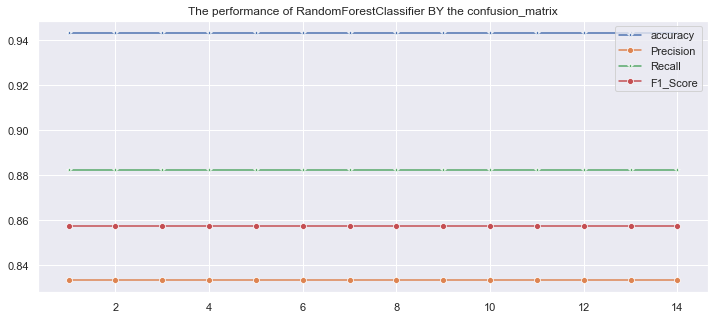

In [61]:
plt.figure(figsize=(12,5))
plt.title('The performance of RandomForestClassifier BY the confusion_matrix')
p = sns.lineplot(range(1,15),rf_Accuracy,marker='*',label='accuracy')
p = sns.lineplot(range(1,15),rf_Precision,marker='o',label='Precision')
p = sns.lineplot(range(1,15),rf_Recall,marker='*',label='Recall')
p = sns.lineplot(range(1,15),rf_F1_Score,marker='o',label='F1_Score')

#### Observation :-
- Accuracy has a greater  than recall.

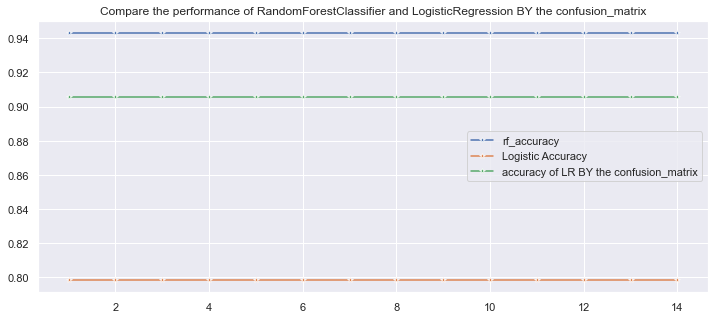

In [62]:
plt.figure(figsize=(12,5))
plt.title('Compare the performance of RandomForestClassifier and LogisticRegression BY the confusion_matrix')
p = sns.lineplot(range(1,15),rf_Accuracy,marker='*',label='rf_accuracy')
p = sns.lineplot(range(1,15),log_acc,marker='*',label='Logistic Accuracy')
p = sns.lineplot(range(1,15),Log_Accuracy,marker='*',label='accuracy of LR BY the confusion_matrix')

#### Observation :-
- With RandomForestClassifier BY the confusion matrix, we were able to obtain 93% accuracy.

In [63]:
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,3,5,6,7,All
True,,,,,,,,
0,15,3,0,0,0,0,0,18
1,2,68,3,5,0,0,0,78
2,1,5,3,7,2,0,0,18
3,0,14,2,60,0,0,0,76
4,0,1,1,1,0,0,0,3
5,0,0,1,2,1,0,0,4
6,0,1,0,0,0,35,0,36
7,0,0,0,0,0,0,40,40
All,18,92,10,75,3,35,40,273


Text(0.5, 12.5, 'Predicted label')

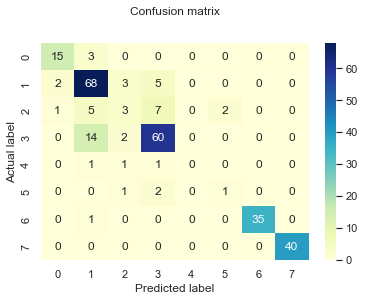

In [64]:
# Creating a Heatmap for the confusion matrix. 
y_pred = clf.predict(x_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Observation :-
- The dark blue shade reflects the accurate prediction.(68 is the actual prediction)
- The light shade reflects the unsatisfactory prediction.(0 is the unsatisfactory prediction.)